 ResNet50을 이용한 전이학습 구현

In [ ]:
# CIFAR-10 dataset을 가져옵니다. 그림을 10가지로 분류하는 문제입니다.

from keras.datasets import cifar10 


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
## 그림의 크기가 32x32, 3은 color 사진을 의미합니다.

x_train.shape
     

(50000, 32, 32, 3)

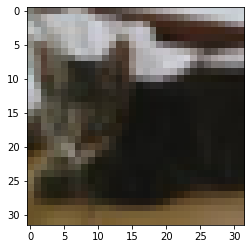

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[9])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import numpy as np

# 그림의 픽셀의 숫자를 0부터 1사이로 하기 위해 255로 나누었습니다. 

# 그림의 크기는 32x32x3

# x_train과 y_train으로만 실습을 할 예정입니다.

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255

y_train = to_categorical(y_train)   # one-hot encoding
y_test = to_categorical(y_test)


In [ ]:


from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trans_model = ResNet50(include_top=False,  # False로 하여 마지막 soft-max로 이루워진 prediction 부분을 제거합니다.
                 weights="imagenet",
                 input_shape=(32, 32, 3),   
                 classes=1000) 



94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# ResNet50 구성
trans_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [ ]:
### trans_model은 pretrain이 된 ResNet부분이고, 
### 학습하기에는 너무 거대합니다. 그렇다면 학습을 못하게 해야 합니다.
trans_model.trainable = False


from tensorflow.keras.layers import Flatten, Dropout

model= Sequential()

model.add(trans_model) ### ResNet부분인 trans_model을 여기에 넣었습니다.
model.add(Flatten())

model.add(Dense(32,  activation='relu'))
model.add(Dense(16,  activation='relu'))

model.add(Dense(10,activation='softmax')) 


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 23,653,978
Trainable params: 66,266
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=60, batch_size=200, verbose=1) ## 여기

Epoch 1/60
250/250 [==============================] - 181s 709ms/step - loss: 2.2768 - accuracy: 0.1334
Epoch 2/60
250/250 [==============================] - 174s 695ms/step - loss: 2.1169 - accuracy: 0.2227
Epoch 3/60
250/250 [==============================] - 176s 704ms/step - loss: 1.9766 - accuracy: 0.2693
Epoch 4/60
250/250 [==============================] - 176s 704ms/step - loss: 1.9222 - accuracy: 0.2966
Epoch 5/60
250/250 [==============================] - 173s 694ms/step - loss: 1.8803 - accuracy: 0.3129
Epoch 6/60
250/250 [==============================] - 176s 704ms/step - loss: 1.8599 - accuracy: 0.3217
Epoch 7/60
250/250 [==============================] - 177s 708ms/step - loss: 1.8347 - accuracy: 0.3319
Epoch 8/60
250/250 [==============================] - 174s 697ms/step - loss: 1.8151 - accuracy: 0.3390
Epoch 9/60
250/250 [==============================] - 177s 707ms/step - loss: 1.7942 - accuracy: 0.3490
Epoch 10/60
250/250 [==============================] - 176s 705m